# Nyquist Stability Criterion

In [ ]:
#| default_exp nyquist_stability_criterion

In [ ]:
#| include: false
%load_ext autoreload
%autoreload 2

In [ ]:
#| export
import numpy as np
import matplotlib.pyplot as plt
import control

In [ ]:
#| include: false
from matplotlib.animation import FuncAnimation

Note: to use `FuncAnimation` please uncomment line: `%matplotlib notebook` in each cell. It is currently commented to avoid errors in github CI.

## Open and Close Loop Analysis

Let's consider a typical open loop control system, with plant $G(s)$ and controller $H(s)$:

<tr>
<td> <img src="img/typical-control-system-1.png" alt="typical-control-system" style="width: 500px;"/> </td>
</tr>  

- We typically know both $G(s)$ and $H(s)$
- The open loop transfer function is $G(s)H(s)$

When we close the loop:

<tr>
<td> <img src="img/typical-control-system-2.png" alt="typical-control-system" style="width: 500px;"/> </td>
</tr>  

- This changes the transfer function for the entire system, which becomes:

$$
\frac{G(s)}{1+G(s)H(s)}
$$


We can then differentiate two cases:

**Open Loop case**

To find out if the open loop system is stable:
- analyse the poles of $G(s)H(s)$ (when this transfer function goes to infinity)
- if there is a pole with $Re > 0$, then the open loop transfer function is unstable

**Closed Loop case**

To find out if the closed loop system is stable:

$$
\frac{G(s)}{1+G(s)H(s)}
$$
- analyse the denominator: $1+G(s)H(s) = 0$ (so that the closed loop transfer function goes to infinity)
- zeros (roots of the numerator) of $1+G(s)H(s) = 0$ causes the closed loop transfer function to go to infinity
- if there is a root with $Re > 0$, then the closed loop transfer function is unstable

**Note** we are assuming that $G(s)$ and $H(s)$ are known, so poles and zeros of $G(s)H(s)$ are known. We can analyse this function and make a determination on whether the system is open loop stable or not.

At the same time, note that we would like to understand how the closed loop system behaves.

**Goal**
- When we want to study the stability of the closed loop system:
    - We want to find the roots of $1+𝐺(𝑠)𝐻(𝑠)=0$, 
    - or take the open loop transfer function $G(s)H(s)$, add 1 and find its zeros.

**Why is this difficult**
- The system can be high order (e.g. order 50), 
- Finding zeros would only give us stability information, 
- Other information could be useful (e.g. stability margins).


Let's understand this a little better plotting poles and zeros of a transfer function.

We use the Python Control Library, and define our transfer function that we call `sys`:

In [ ]:
sys = control.tf([1, 3, 5, 7], [2, 4, 6, 8, 2])

In [ ]:
print(sys)


     s^3 + 3 s^2 + 5 s + 7
-------------------------------
2 s^4 + 4 s^3 + 6 s^2 + 8 s + 2



Now we plot the poles and zeros for the open loop system $G(s)H(s)$. And for the stability we are interested in the location of the poles, plotted in red in the picture.

We can use the [pzmap](https://python-control.readthedocs.io/en/latest/generated/control.pzmap.html) function of the Python Control Library to plot poles and zeros.

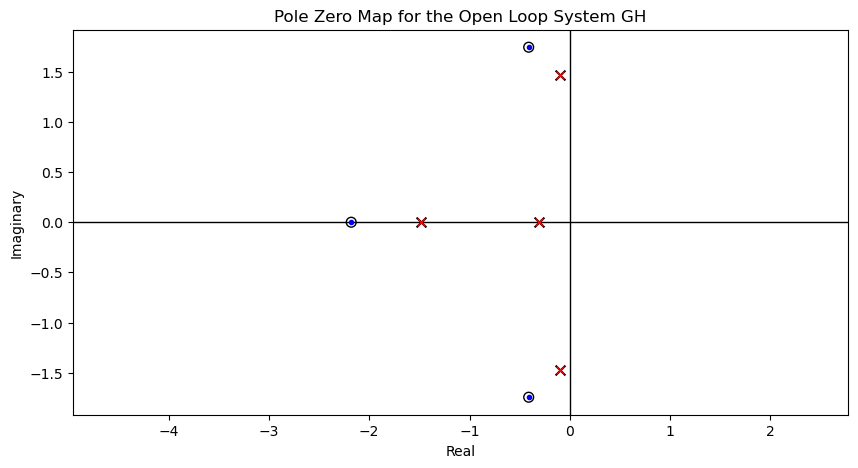

In [ ]:
fig = plt.figure(figsize=(10, 5))

# Calls function pzmap which calculates poles and zeros
control.pzmap(sys, title='Pole Zero Map for the Open Loop System GH');
       
# What is really happening is that pzmap is plotting the roots of the denominator (poles) 
# and the roots of the numerator (zeros). We can show this plotting the roots explicitely:

# zeros - roots of the numerator
plt.plot(np.real(np.roots([1, 3, 5, 7])), np.imag(np.roots([1, 3, 5, 7])),'b.');

# poles - roots of the denominator
plt.plot(np.real(np.roots([2, 4, 6, 8, 2])), np.imag(np.roots([2, 4, 6, 8, 2])),'rx');

And now let's plot poles and zeros of the closed loop system.

**Note**:
- we are now interested in the location of the zeros, plotted in red in the picture; we are interested in  $1+G(s)H(s)$.

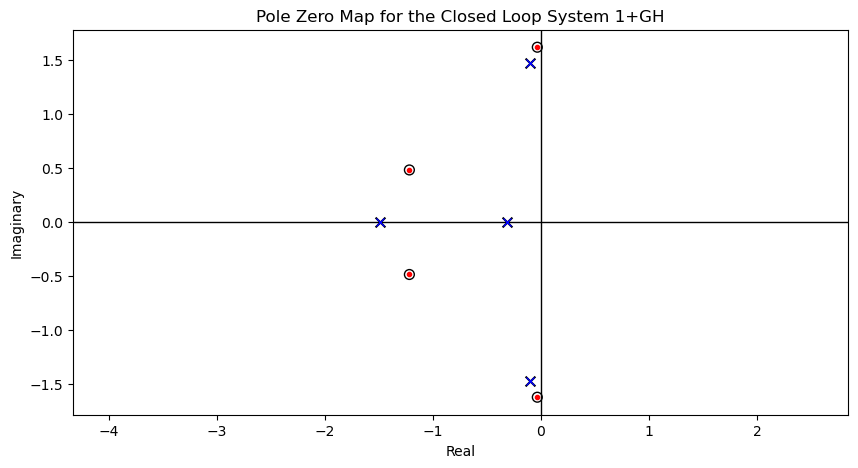

In [ ]:
fig = plt.figure(figsize=(10, 5))


control.pzmap(sys+1, title='Pole Zero Map for the Closed Loop System 1+GH');

# zeros - roots of the numerator -  these are the poles of the Closed loop transfer function
plt.plot(np.real(np.roots(np.array([2, 4, 6, 8, 2])+np.array([0, 1, 3, 5, 7]))), 
         np.imag(np.roots(np.array([2, 4, 6, 8, 2])+np.array([0, 1, 3, 5, 7]))),'r.') 

# poles - roots of the denominator
plt.plot(np.real(np.roots([2, 4, 6, 8, 2])), np.imag(np.roots([2, 4, 6, 8, 2])),'bx');

- **There is not a clear relationship between the poles of $G(s)H(s)$ and the zeros of $1+G(s)H(s)$,**
- When we add 1 this can really move the location of the roots substantially

Let's instead plot the Nyquist diagram. For now we just call the `nyquist_plot` function from the Python Control Library:

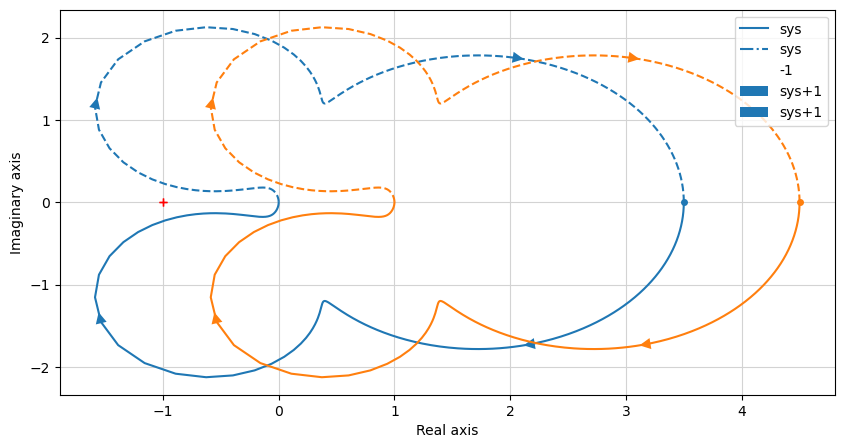

In [ ]:
fig = plt.figure(figsize=(10, 5))
# nyquist_plot to plot the Nyquist plot
control.nyquist_plot([sys, 1+sys]);


plt.legend(['sys', 'sys', '-1', 'sys+1', 'sys+1'], loc='upper right');

And on the Nyquist plot it is simple to see that we are really only adding 1 and shifting it accordingly.
- Adding 1 and calculate the how this affects zeros/poles is difficult
- Adding 1 to a Nyquist plot is easy to do

If we know how to understand the stability from the Nyquist plot then everthing becomes easier

### How to generate the Nyquist Plot

- Once we know how to generate a Nyquist plot, it is easy to understand how it relates to stability
- Key is the Cauchy's Argument Principle

#### Cauchy's Argument Principle

Let's take an arbitraty transfer function:

$$
G(s) = \frac{s+3}{s+2}
$$

- Pole $s=-2$ 
- Zero $s=-3$

------

We can plot poles and zeros in the s-plane:

<tr>
<td> <img src="img/nyquist_zeros_poles.png" alt="nyquist_zeros_poles" style="width: 300px;"/> </td>
</tr>  


If we take one point in the s-plane, for example: $s=-2+1j$, we get another complex number when we plug it in $G(s)$:

$$
 \frac{s+3}{s+2} = \frac{(-2+1j)+3}{(-2+1j)+2} = \frac{1+1j}{j} = \frac{1+1j}{j}\frac{-j}{-j} = 1 -j 
$$



And we can plot this new complex number on another plane (that we can call $\Omega$-plane):

<tr>
<td> <img src="img/nyquist_w_plane.png" alt="nyquist_w_plane" style="width: 300px;"/> </td>
</tr> 


Our transfer function is mapping a point from the s-plane into a new point into the new plane $\Omega$
- As we pick more and more points in the s-plane, forming a continuous line in the s-plane (_contour_), they will form a continuous line in the $\Omega$-plane
- And if we pick points on a **contour** in the s-plane (a line that closes up on itself), it becomes a closed line in the $\Omega$-plane (we call it a **plot**)
- The plot contains the magnite and phase information for each of the system's poles and zeros.

----------------

Let's verify this in Python:

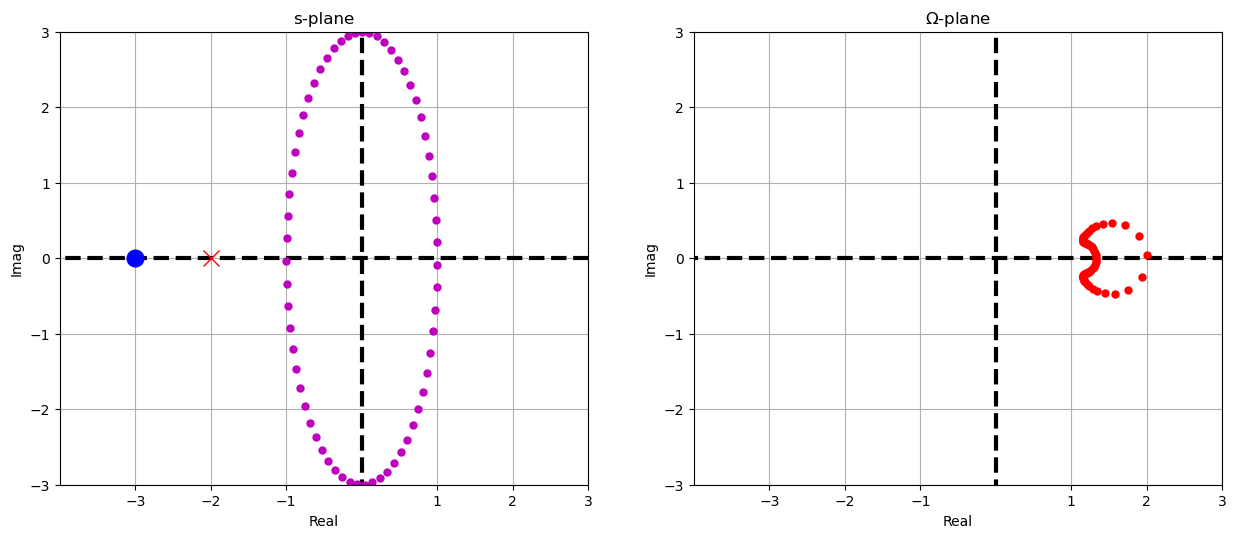

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
     
########################################
# This is only to add some more context to the plots (axis, grids and scales the axis)
for i in range(len(axs)):
    axs[i].plot([-10, 10], [0, 0], color='black', linewidth=3, linestyle='--') # axis
    axs[i].plot([0, 0], [-10, 10], color='black', linewidth=3, linestyle='--') # axis
    axs[i].axis([-4, 3, -3, 3]) # scales the axis
    axs[i].grid() # add grid
    axs[i].set_aspect('equal', 'box')
    axs[i].set_xticks([-3, -2, -1, 1, 2, 3])
    axs[i].set_xlabel('Real')
    axs[i].set_ylabel('Imag');    
axs[0].set_title('s-plane')
axs[1].set_title('$\Omega$-plane')
########################################        
    
# plot our poles and zeros in the s-plane    
axs[0].plot(-3, 0, color='blue', marker='o', markersize=12)
axs[0].plot(-2, 0, color='red', marker='x', markersize=12)

# This is the interesting part:  
#    Map between s-plane and Omega plane.
#    Thefor loop is simply doing the same operation for all points selected in the
#    s-plane (s_point). This is what we have done manually above.
for xi in np.arange(0, 6.28, 0.1):
    s_point = np.sin(xi), 3*np.cos(xi) # pick one s-point
    axs[0].plot(s_point[0],s_point[1], # plot the s-point in the s-plane
                marker='.', color='m', markersize=10)
    
    # Map one s_point to a W_point
    W_point = (complex(s_point[0],s_point[1]) + 3)/(complex(s_point[0],s_point[1]) + 2)    # This is our transfer function
    axs[1].plot(np.real(W_point), np.imag(W_point), marker='.', color='r', markersize=10)  # plot the point      

- The contour in the $\Omega$-plane is the codomain of the Transfer function and for this reason it contains information on the magnitude and phase of the zeros and poles of the transfer function.
- This is useful to calculate the stability of the transfer function

------------------------------

For simplicity let's now consider a simpler transfer function, with only one zero:

$$
G(s)=s+2
$$


- If we take the a point on the s-plane: $s=-1+j$, 
- it becomes the point: $(-1+j)+2=1+j$ in the $\Omega$-plane.

<tr>
<td> <img src="img/nyquist_zero_map_s_plane.png" alt="nyquist_zero_map_s_plane" style="width: 300px;"/> </td>
<td> <img src="img/nyquist_zero_map_w_plane.png" alt="nyquist_zero_map_w_plane" style="width: 300px;"/> </td>
</tr> 

- It is important to note that the new point in the $\Omega$-plane and the phasor between the zero and the point we chose in the s-plane **is the same phasor**
- This extends to multiple poles and zeros
- This means that it is possible to plot the mapping between the two planes graphically

To do this:

- 1. Pick the point in the s-plane that you want to map over to the $\Omega$-plane
- 2. Draw all the phasors from zeros and poles to the point
- 3. Calculate the magnitude multiplying the magnitudes of the zeros and dividing by the magnitude of the poles
   - This resulting magnitude is the length of the phasor in $\Omega$-plane
- 4. Calculate the phase adding all the zero phases and subtracting all the pole phases


$$
G(s)H(s) = \frac{(s-\beta_1)(s-\beta_2)...}{(s-\alpha_1)(s-\alpha_2)...}
$$

<tr>
<td> <img src="img/nyquist_mulitple_pz_map_s_plane_10.png" alt="nyquist_mulitple_pz_map_s_plane_10" style="height: 400px;"/> </td>
<td> <img src="img/nyquist_mulitple_omega_plot_5.png" alt="nyquist_mulitple_omega_plot_5" style="height: 400px;"/> </td>
</tr> 

This is called a **Polar plot**, they tell us about the magnitude and phase contribution of a system at various frequency.

------------

- Let's understand now what happens when we move along an arbitrary contour:


<tr>
<td> <img src="img/nyquist_mulitple_pz_map_s_plane_10-contour-1.png" alt="nyquist_mulitple_pz_map_s_plane_10" style="height: 400px;"/> </td>
</tr> 

- For each point along the contour we apply the same reasoning:
   1. Calculate the magnitude multiplying the magnitudes of the zeros and dividing by the magnitude of the poles
   2. Calculate the phase adding all the zero phases and subtracting all the pole phases
- Note that, as we move along the contour:
   - the zero $\beta_1$ will contribute a net angle of $-2\pi$
   - the zero $\beta_2$ will contribute a net angle of $0$ (as we move, for each positive angle there is a negative angle). This is true for every other pole or zero out of the contour.
   
- Using this insight we can say from a qualitative standpoint:
   - The resulting contour is the $\Omega$-plane will encircle the origin once and only one, in the clockwise direction because the angle is $-2\pi$.
   - We are not interested in the specific shape, but we know that will encircle the origin

- What happens if there is a pole inside the contour? 

<tr>
<td> <img src="img/nyquist_mulitple_pz_map_s_plane_10-pole-contour.png" alt="nyquist_mulitple_pz_map_s_plane_10" style="height: 400px;"/> </td>
</tr> 

- As we move along the contour:
   - the pole inside the contour will contribute a total angle of $-2\pi$
   - **but** a pole is at the denominator of $G(s)H(s)$ and hence this contributes a further negative phase: hence the total angle is $2\pi$
   - we still encircle the origin of the $\Omega$-plane once but now in the counter-clockwise direction

------------------

The following Python code, demonstrates how the mapping works for the following cases:
- one pole encircled by the contour in the s-plane
- one zero encircled by the contour in the s-plane
- one pole not-encircled
- more complex transfer functions: 
   - no point goes around a pole or a zero
   - points go around a pole or a zero
   
Comment and uncomment the various parts to see how points in the s-plane are mapped into points in the $\Omega$-plane.

And of course, you can change the code below to experiment yourself!

<IPython.core.display.Javascript object>


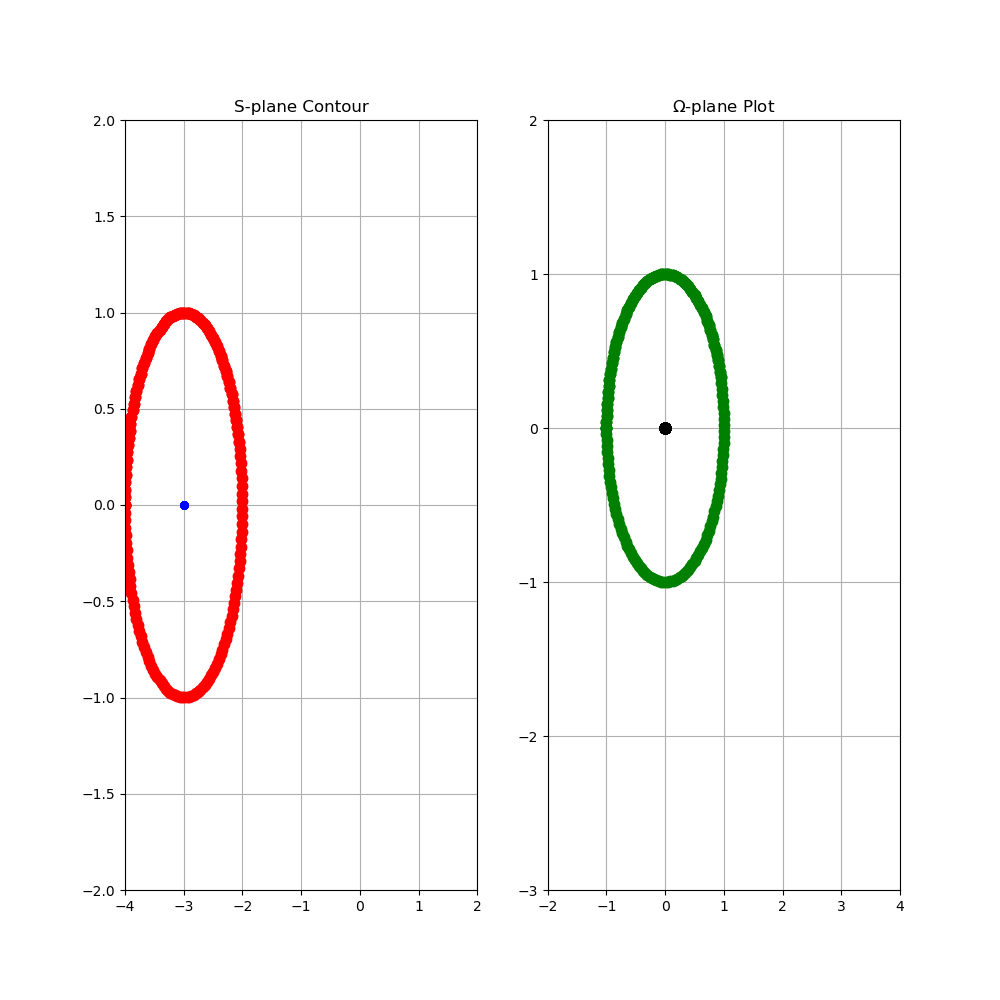

In [ ]:
# %matplotlib notebook
fig, axs = plt.subplots(1, 2, figsize=(10, 10));
line_0, = axs[0].plot([])     # A tuple unpacking to unpack the only plot
line_1, = axs[1].plot([])     # A tuple unpacking to unpack the only plot
axs[0].grid()
axs[1].grid()


################################
# The first three contours have been demonstrated in class for cases 1, 2, 3 below
# 1. First contour: no point goes around a pole or a zero
# contour = 1
# xoff = -2 #-0.75  # X-offset of the contour
# yoff = 0; #%0.75;  # Y-offset of the contour
# angles = np.linspace(2*np.pi, 0, 160);     # Generate angles around the circle; 160 is tje Number of points around the circular contour

# 2. Second contour: points go around a zero
# contour = 2
# xoff = 0.5  # X-offset of the contour
# yoff = 0;   # Y-offset of the contour
# angles = np.linspace(np.pi, -np.pi, 160);     # Generate angles around the circle; 160 is tje Number of points around the circular contour

# 3. Third contour: no point goes around a pole or a zero
# contour = 3
# xoff = -3  # X-offset of the contour
# yoff = 2.5;   # Y-offset of the contour
# angles = np.linspace(np.pi, -np.pi, 160);     # Generate angles around the circle; 160 is tje Number of points around the circular contour

################################
# Contours 4 and 5 have been demonstrated in class for simpler transfer functions, for cases 4, 5 and 6
# 4. Fourth contour: goes around a zero (ex.)
contour = 4
xoff = -3   # X-offset of the contour
yoff = 0;   # Y-offset of the contour
angles = np.linspace(np.pi, -np.pi, 160);     # Generate angles around the circle; 160 is tje Number of points around the circular contour

# 5. Fifth contour: does not go around a zero (ex.)
# contour = 4
# xoff = 0    # X-offset of the contour
# yoff = 0;   # Y-offset of the contour
# angles = np.linspace(np.pi, -np.pi, 160);     # Generate angles around the circle; 160 is tje Number of points around the circular contour
################################


# define the points in the countour based on the parameters of the countours defined above    
pt = [np.cos(angles)+xoff, np.sin(angles)+yoff]; 

def animate_plot(bin):    
    # Set 's' to the next point on the contour
    s = complex(pt[0][bin], pt[1][bin]);

    # Plot the next point on the contour in the s-plane    
    line_0 = axs[0].plot(np.real(s), np.imag(s), color='red', marker='.', markersize=15);
    axs[0].set_title('S-plane Contour');

    # Define the system transfer function, uncomment the one you're running

    ##################################################
    # CASE 1: 2 poles and 1 zero (!)
#     tnf = s/(s**2 + 6*s + 18)
#     axs[0].plot([-3], [3], color='blue', marker='x', markersize=10);
#     axs[0].plot([-3], [-3], color='blue', marker='x', markersize=10);
#     axs[0].plot([0], [0], color='blue', marker='o', markersize=10);
#     axs[0].set_xlim([-5, 2])
#     axs[0].set_ylim([-5, 5])    
    
    # CASE 2: 2 poles and 2 zeros
    # tnf = (s**2 + 1.5*s + 0.8125)/((s + 1)*(s + 0.8))
    # axs[0].plot([-1, -.8] , [0, 0], color='blue', marker='x', markersize=10);
    # axs[0].plot([-0.75, -0.75], [.5, -.5], color='blue', marker='o', markersize=10);
    # axs[0].set_xlim([-3, 2])
    # axs[0].set_ylim([-2, 2]);

    # CASE 3: 2 poles only
    # tnf = 1/((s + 1)*(s + 0.8)); 
    # axs[0].plot([-1, -.8] , [0 0], color='blue', marker='x', markersize=10);
    # axs[0].set_xlim([-3, 2])
    # axs[0].set_ylim([-2, 2]);
    
    ##################################################
    # CASE 4: 1 zero 
    # Demonstrated with the fourth contour to show how the mapped contour moves around the origin
    # when the s-plane contour goes around the zero
    tnf = (s + 3); 
    axs[0].plot([-3] , [0], color='blue', marker='.', markersize=10);
    axs[0].set_xlim([-4, 2])
    axs[0].set_ylim([-2, 2]);   

    # CASE 5: 1 pole 
    # Demonstrated with the fourth contour to show how the mapped contour moves around the origin
    # when the s-plane contour goes around the pole
#     tnf = 1/((s + 3)); 
#     axs[0].plot([-3] , [0], color='blue', marker='x', markersize=10);
#     axs[0].set_xlim([-4, 2])
#     axs[0].set_ylim([-2, 2]);
    
    # CASE 6: 1 pole
    # Demonstrated with the fifth contour to show how the mapped contour moves around the origin
    # when the s-plane contour DOES NOT go around the pole
#     tnf = 1/((s + 1)); 
#     axs[0].plot([-1] , [0], color='blue', marker='x', markersize=10);
#     axs[0].set_xlim([-3, 2])
#     axs[0].set_ylim([-2, 2]);
    
    
    #####
    # Plot the mapping from the TF in the w-plane    
    line_1 = axs[1].plot(np.real(tnf), np.imag(tnf), color='g', marker='.', markersize=15);
    axs[1].plot(0, 0, marker='.', color='k', markersize=15);
    axs[1].set_title('$\Omega$-plane Plot');
    # Sets the axis limits    
    if contour == 1 or contour == 2:
        axs[1].set_xlim([-.5, .5])
        axs[1].set_ylim([-.5, .5]);    
    elif contour == 4 or contour == 5:
        axs[1].set_xlim([-2, 4]);
        axs[1].set_ylim([-3, 2]);
    else:
        axs[1].set_xlim([-3, 2])
        axs[1].set_ylim([-3, 2]);       

    return line_0, line_1

anim = FuncAnimation(fig, animate_plot, frames=len(angles), interval=20)
anim;

#### Notes
- When we select a contour choosing points in the s-plane that never go around a pole or a zero, then the phase never goes around 360 degree. In the example above, the phase stays within approximately 150 and 210 degrees (`countour 1` in the code cell above, `case 1`)
- When we go around a zero in a clockwise direction we would _add_ 360 degree of phase as we move around the zero, and the point in the $\Omega$-plane rotates 360 degree in the _clockwise_ direction (see `contour 2` in the code cell above, `case 1`)
- When we go around a pole in a clockwise direction we would _subtract_ 360 degree of phase as we move around the pole, and the point in the $\Omega$-plane rotates 360 degree in the _counter-clockwise_ direction  (see `contour 3` in the code cell above, `case 1`)

What is happening becomes clearer when we plot what happens for a single pole:
 - moving around the pole in a clockwise direction, and the resulting plot circles the origin once in the counter-clockwise direction since we are subtracting 360 degree of phase

<IPython.core.display.Javascript object>


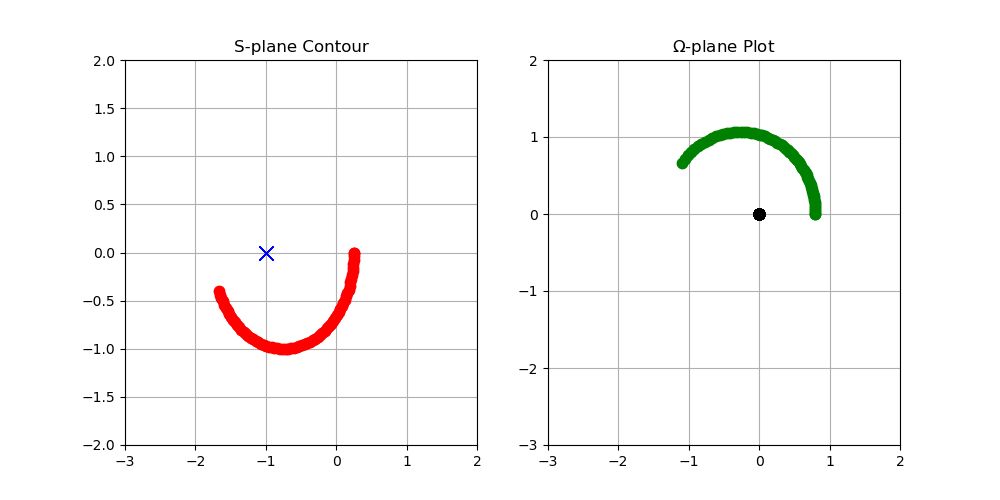

In [ ]:
# %matplotlib notebook
fig, axs = plt.subplots(1, 2, figsize=(10, 5));
line_0, = axs[0].plot([])     # A tuple unpacking to unpack the only plot
line_1, = axs[1].plot([])     # A tuple unpacking to unpack the only plot
axs[0].grid()
axs[1].grid()

xoff = -0.75  # X-offset of the contour
yoff = 0;     # Y-offset of the contour
angles = np.linspace(2*np.pi, 0, 160);  # Generate angles around the circle; 160 is tje Number of points around the circular contour


pt = [np.cos(angles)+xoff, np.sin(angles)+yoff]; 

def animate_plot(bin):    
    # Set 's' to the next point on the contour
    s = complex(pt[0][bin], pt[1][bin]);

    # Plot the next point on the contour in the s-plane    
    line_0 = axs[0].plot(np.real(s), np.imag(s), color='red', marker='.', markersize=15);
    axs[0].set_title('S-plane Contour');

    # Define the system transfer function
   
    #  1 pole
    tnf = 1/((s + 1)); 
    axs[0].plot([-1] , [0], color='blue', marker='x', markersize=10);
    axs[0].set_xlim([-3, 2])
    axs[0].set_ylim([-2, 2]);


    # Plot the mapping from the TF in the w-plane    
    line_1 = axs[1].plot(np.real(tnf), np.imag(tnf), color='g', marker='.', markersize=15);
    axs[1].plot(0, 0, marker='.', color='k', markersize=15);
    axs[1].set_title('$\Omega$-plane Plot');        
    axs[1].set_xlim([-3, 2])
    axs[1].set_ylim([-3, 2]);

    return line_0, line_1

anim = FuncAnimation(fig, animate_plot, frames=len(angles), interval=20)
anim;

- If we now add a second pole, there will be two rotations around the origin, one for each pole

<IPython.core.display.Javascript object>


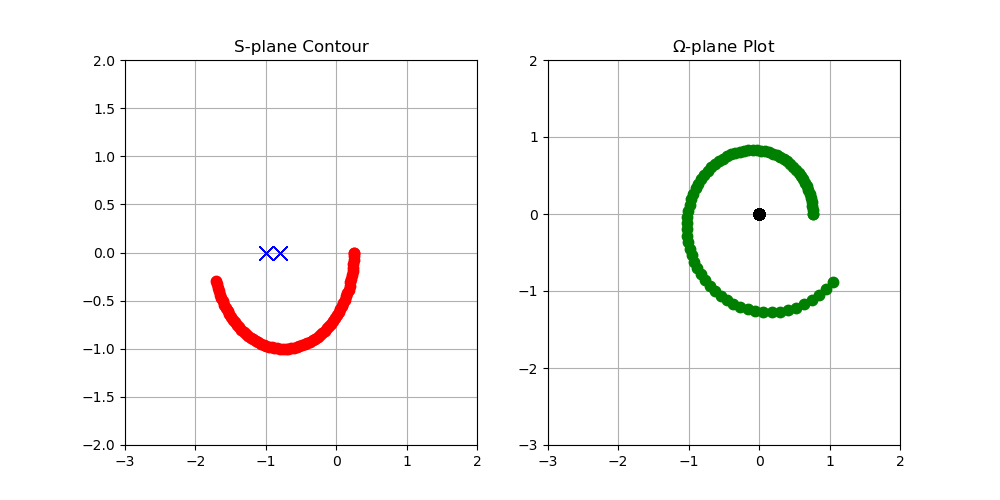

In [ ]:
# %matplotlib notebook
fig, axs = plt.subplots(1, 2, figsize=(10, 5));
line_0, = axs[0].plot([])     # A tuple unpacking to unpack the only plot
line_1, = axs[1].plot([])     # A tuple unpacking to unpack the only plot
axs[0].grid()
axs[1].grid()

xoff = -0.75  # X-offset of the contour
yoff = 0;     # Y-offset of the contour
angles = np.linspace(2*np.pi, 0, 160);  # Generate angles around the circle; 160 is tje Number of points around the circular contour


pt = [np.cos(angles)+xoff, np.sin(angles)+yoff]; 

def animate_plot(bin):    
    # Set 's' to the next point on the contour
    s = complex(pt[0][bin], pt[1][bin]);

    # Plot the next point on the contour in the s-plane    
    line_0 = axs[0].plot(np.real(s), np.imag(s), color='red', marker='.', markersize=15);
    axs[0].set_title('S-plane Contour');

    # Define the system transfer function
   
    #  2 poles only
    tnf = 1/((s + 1)*(s + 0.8)); 
    axs[0].plot([-1] , [0], color='blue', marker='x', markersize=10);
    axs[0].plot([-.8], [0], color='blue', marker='x', markersize=10);
    axs[0].set_xlim([-3, 2])
    axs[0].set_ylim([-2, 2]);


    # Plot the mapping from the TF in the w-plane    
    line_1 = axs[1].plot(np.real(tnf), np.imag(tnf), color='g', marker='.', markersize=15);
    axs[1].plot(0, 0, marker='.', color='k', markersize=15);
    axs[1].set_title('$\Omega$-plane Plot');        
    axs[1].set_xlim([-3, 2])
    axs[1].set_ylim([-3, 2]);

    return line_0, line_1

anim = FuncAnimation(fig, animate_plot, frames=len(angles), interval=20)
anim;

Final example
- we add two more zeros
- we do not circle the origin at all: we are adding 360 degree twice for the zeros but at the same time we are subtracting the phase of the two poles.

<IPython.core.display.Javascript object>


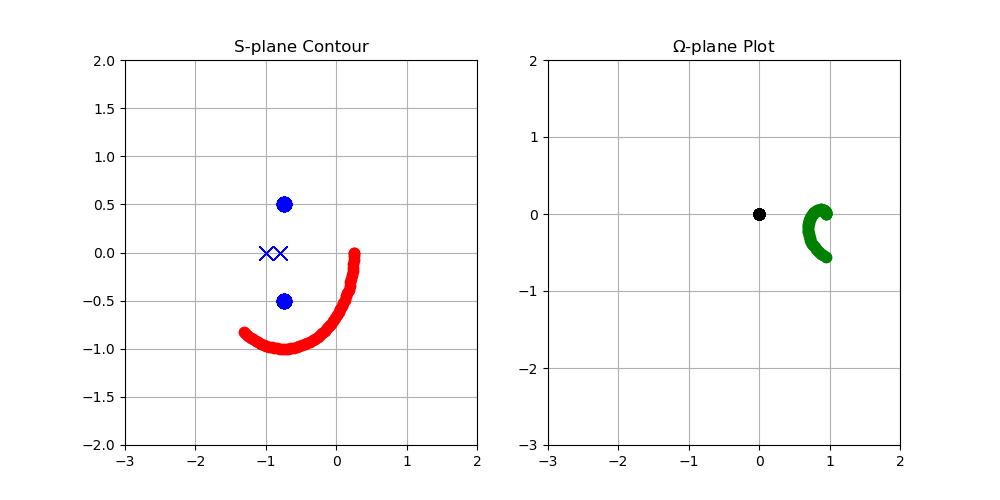

In [ ]:
# %matplotlib notebook
fig, axs = plt.subplots(1, 2, figsize=(10, 5));
line_0, = axs[0].plot([])     # A tuple unpacking to unpack the only plot
line_1, = axs[1].plot([])     # A tuple unpacking to unpack the only plot
axs[0].grid()
axs[1].grid()

xoff = -0.75  # X-offset of the contour
yoff = 0;     # Y-offset of the contour
angles = np.linspace(2*np.pi, 0, 160);  # Generate angles around the circle; 160 is tje Number of points around the circular contour


pt = [np.cos(angles)+xoff, np.sin(angles)+yoff]; 

def animate_plot(bin):    
    # Set 's' to the next point on the contour
    s = complex(pt[0][bin], pt[1][bin]);

    # Plot the next point on the contour in the s-plane    
    line_0 = axs[0].plot(np.real(s), np.imag(s), color='red', marker='.', markersize=15);
    axs[0].set_title('S-plane Contour');
    
    # Define the system transfer function
    # 2 poles and 2 zeros
    tnf = (s**2 + 1.5*s + 0.8125)/((s + 1)*(s + 0.8))
    axs[0].plot([-1] , [0], color='blue', marker='x', markersize=10);
    axs[0].plot([-.8], [0], color='blue', marker='x', markersize=10);
    axs[0].plot([-0.75], [.5], color='blue', marker='o', markersize=10);
    axs[0].plot([-0.75], [-.5], color='blue', marker='o', markersize=10);
    axs[0].set_xlim([-3, 2])
    axs[0].set_ylim([-2, 2]);


    # Plot the mapping from the TF in the w-plane    
    line_1 = axs[1].plot(np.real(tnf), np.imag(tnf), color='g', marker='.', markersize=15);
    axs[1].plot(0, 0, marker='.', color='k', markersize=15);
    axs[1].set_title('$\Omega$-plane Plot');        
    axs[1].set_xlim([-3, 2])
    axs[1].set_ylim([-3, 2]);

    return line_0, line_1

anim = FuncAnimation(fig, animate_plot, frames=len(angles), interval=20)
anim;

-----------------------------------------------------------------

#### Cauchy's argument principle

> - We can tell the relative difference between the number of poles and zeros inside of a contour by counting how many time the plot circles the origin and in which direction

------------------------------------------------------------

<IPython.core.display.Javascript object>


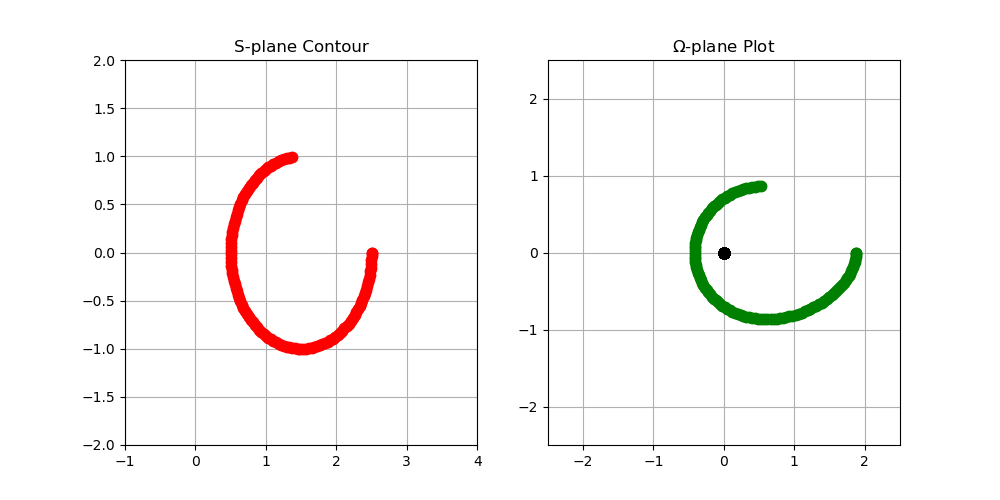

In [ ]:
# %matplotlib notebook
fig, axs = plt.subplots(1, 2, figsize=(10, 5));
line_0, = axs[0].plot([])     # A tuple unpacking to unpack the only plot
line_1, = axs[1].plot([])     # A tuple unpacking to unpack the only plot
axs[0].grid()
axs[1].grid()

xoff = 1.5  # X-offset of the contour
yoff = 0;     # Y-offset of the contour
angles = np.linspace(2*np.pi, 0, 160);  # Generate angles around the circle; 160 is tje Number of points around the circular contour


pt = [np.cos(angles)+xoff, np.sin(angles)+yoff]; 

def animate_plot(bin):    
    # Set 's' to the next point on the contour
    s = complex(pt[0][bin], pt[1][bin]);

    # Plot the next point on the contour in the s-plane    
    line_0 = axs[0].plot(np.real(s), np.imag(s), color='red', marker='.', markersize=15);
    axs[0].set_title('S-plane Contour');
    
    # Define the system transfer function    
    tnf = (s-1)*(s-1.5)/(s-1.7)
#     axs[0].plot([1.7] , [0], color='blue', marker='x', markersize=10);
#     axs[0].plot([1], [0], color='blue', marker='o', markersize=10);
#     axs[0].plot([1.5], [0], color='blue', marker='o', markersize=10);
    axs[0].set_xlim([-1, 4])
    axs[0].set_ylim([-2, 2]);


    # Plot the mapping from the TF in the w-plane    
    line_1 = axs[1].plot(np.real(tnf), np.imag(tnf), color='g', marker='.', markersize=15);
    axs[1].plot(0, 0, marker='.', color='k', markersize=15);
    axs[1].set_title('$\Omega$-plane Plot');        
    axs[1].set_xlim([-2.5, 2.5])
    axs[1].set_ylim([-2.5, 2.5]);

    return line_0, line_1

anim = FuncAnimation(fig, animate_plot, frames=len(angles), interval=20)
anim;

**Question:**
 - Given the contour in red above, and the corresponding clockwise mapping in green, 
 - what can you tell about the number of poles and zeros inside the red contour?

In [ ]:
# Uncomment the following line to see the solution
!cat answers/solution_nyquist_1


* Circles the origin once in the clockwise direction, so there must be one more zero than poles inside the contour

* It is important to note that we can only tell about the relative difference between poles and zeros

Let's see another example:

<IPython.core.display.Javascript object>


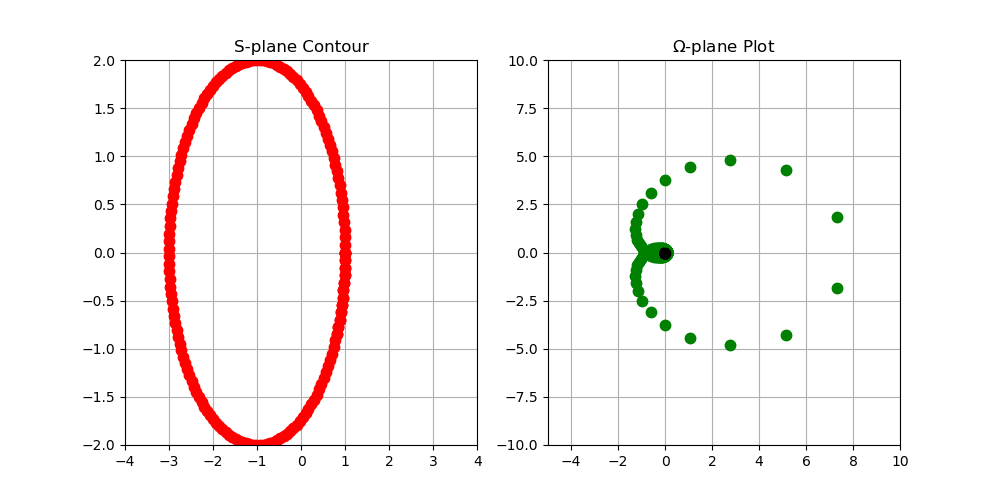

In [ ]:
# %matplotlib notebook
fig, axs = plt.subplots(1, 2, figsize=(10, 5));
line_0, = axs[0].plot([])     # A tuple unpacking to unpack the only plot
line_1, = axs[1].plot([])     # A tuple unpacking to unpack the only plot
axs[0].grid()
axs[1].grid()

xoff = -1  # X-offset of the contour
yoff = 0;     # Y-offset of the contour
angles = np.linspace(2*np.pi, 0, 160);  # Generate angles around the circle; 160 is tje Number of points around the circular contour


pt = [2*np.cos(angles)+xoff, 2*np.sin(angles)+yoff]; 

def animate_plot(bin):    
    # Set 's' to the next point on the contour
    s = complex(pt[0][bin], pt[1][bin]);

    # Plot the next point on the contour in the s-plane    
    line_0 = axs[0].plot(np.real(s), np.imag(s), color='red', marker='.', markersize=15);
    axs[0].set_title('S-plane Contour');
    
    # Define the system transfer function
    tnf = (s+1)/((s+1.7)*(s+2.8)*(s+2))
    axs[0].set_xlim([-4, 4])
    axs[0].set_ylim([-2, 2]);

    # Plot the mapping from the TF in the w-plane    
    line_1 = axs[1].plot(np.real(tnf), np.imag(tnf), color='g', marker='.', markersize=15);
    axs[1].plot(0, 0, marker='.', color='k', markersize=15);
    axs[1].set_title('$\Omega$-plane Plot');        
    axs[1].set_xlim([-5, 10])
    axs[1].set_ylim([-10, 10]);

    return line_0, line_1

anim = FuncAnimation(fig, animate_plot, frames=len(angles), interval=20)
anim;

**Question:** 
 - Given the contour in red above, and the corresponding counterclockwise mapping in green, 
 - what can you tell about the number of poles and zeros inside the red contour?

In [ ]:
# Uncomment the following line to see the solution
!cat answers/solution_nyquist_2


* Circles the origin twice in the counter-clockwise direction, so there must be two more poles than zeros inside the contour.

### The Nyquist plot  

- We can now apply the Cauchy's principle argument 
- We would like to know if there are zeros of $1+GH$ in the right half plane (in which case the system is unstable)

- We need a contour that includes the entire right half plane:
   - includes the entire imaginary axis
   - goes up until $+j\omega$
   - sweeps around at $\infty$ to enclose the entire RHP
   - goes back to the imaginary axis at $-j\omega$ and up to 0

<tr>
<td> <img src="img/nyquist-contour-100.png" alt="nyquist-contour" style="height: 400px;"/> </td>
</tr> 

- This is called the **Nyquist contour**
- Note that it avoids the poles on the imaginary axis
- Mapping the Nyquist contour on the $\Omega$-plane we obtain the **Nyquist plot**
   - To draw it, we need to plug in each single point along the $j\omega$ axis and all the points at $\infty$ in the right half plane
   - We need to repeat the steps we saw before. Will see how to do this in a moment.

- If we take $1+GH$ to map the Nyquist contour (in the s-plane) to the Nyquist plot (in the $\Omega$-plane) 
- We can see how many times the origin is circled and in which direction
- Determine how many more poles or zeros are inside the contour.


- We could directly analyse $1+GH$ (i.e., plot the Nyquist plot of $GH$ and then shift the plot by 1). 
- Or which is simpler:
   - plot $GH$ and shift the origin to the left by 1: we can look at how many circling of the point $-1+0j$ the plot of $GH$ does.

**Steps:**

- Take the open loop transfer function $GH$
- Plot the Nyquist plot of $GH$ (plug in all the points along the Nyquist contour)
- Count the number of times the point $-1$ is encircled and in which direction
- Determine the relative number of poles and zeros inside the nyquist contour.

**Note** 
- The Nyquist method tells us about the relative number of poles and zeros
- To know exactly how many zeros of $1+GH$ we have in the RHP, we need to know how many poles we have in the RHP
- We typically know how many poles $1+GH$ has in the RHP: they are the same as those of the open loop $GH$ system (and we usually know those)

Let's see why:

- The open loop system is:
$$
GH = \frac{N_G}{D_G}\frac{N_H}{D_H}
$$

- And:
$$
1+GH = 1+\frac{N_G}{D_G}\frac{N_H}{D_H} = \frac{D_G D_H + N_G N_H}{D_G D_H}
$$


We can know state the famous Nyquist equation:

Therefore:
$$
Z = N + P
$$

where 
- $Z$ is the number of zeros in the right half plane (or poles in closed loop)
- $N$ is the number of clockwise encirclements of -1
- $P$ is the number of open loop right half plane poles

**Note:**
- $N$ is the number of encirclement of -1 clock wise. 
- It is an algebric quantity
- If we have counter clockwise encirclements we need to invert its sign

### Open loop stable

- When $P=0$ (open loop system is stable)
- $Z=N \Rightarrow N=0$ or no encirclements of the point $-1$ to have a stable closed loop system (for stability $Z=0$).
- This is the condition most often encountered

### Open loop unstable
- In order to guarantee that there are no zeros (roots) in the right half plane, you need to have exactly 1 counter-clockwise (CCW) encirclement of the point -1 for each open loop pole in the right half plane:

$$
P = -N
$$

**Note**
- To know how many zeros of $1+GH$ (roots ot the numerator) are in the right half plane
- We must know the unstable open loop poles of $GH$ 
- Some information on the open loop system is needed

**Comments**
- With the Nyquist plot we can anaylse the stability of a system with an **unstable** open loop plant.
- We cannot use Bode plots to analyse the stability of closed loop systems when the open loop is unstable. We might obtain a wrong answer.

- Bode plots are easy to sketch, but not as powerful to analyse the system stability.

--------------------

## Estimating Nyquist Plots

Given a transfer function:

$$
G(s) = \frac{1}{s^2+3s+2}
$$

with poles: $s=-1, s=-2$

<tr>
<td> <img src="img/nyquist-sketch.png" alt="nyquist-sketch2" style="height: 400px;"/> </td>
</tr> 

- We can select a point on the contour, plug it into the transfer function and calculate the result:


$$
G(s) = \frac{1}{s^2+3s+2}
\Rightarrow
\frac{1}{(2j)^2+3\cdot(2j)+2} = \frac{1}{-4+2 + 6j} =  \frac{1}{-2 + 6j} \frac{-2 - 6j}{-2 - 6j} = \frac{-2 - 6j}{40} = -0.05 - 0.15j 
$$

- This would give us one point in the $\Omega$-plane
- We can do it for every single point in the $s$-plane...

We can identify two main pieces of the Nyquist contour:

- 1. _The imaginary axis_ (the $j\omega$ line), with $\omega \in  [-\infty, +\infty]$.

  We can then replace $s=j\omega$ in the transfer function to calculate it.
  
  Given the symmetry of poles and zeros about the real axis, the negative portion is just the reflection of the positive portion of the axis.
  
  We only need to calculate positive frequencies.
  
  
- 2. _The rest of the countour_: starts at $+\infty$ on the imaginary axis, goes all around to get to $+\infty$ on the real axis and then goes back to $-\infty$ on the imaginary axis. 
  
  **For strictly proper (order of denominator > order of the numerator) or proper systems (order of denominator = order of numerator), this entire segment (which is infinitely long) maps to a single point in the $\Omega$-plane**. 
  
  All physically realisable systems are of these two types...
  

Remember that:
- the phase in the $\Omega$-plane is:
$$
\angle P_\Omega = \sum \angle \text{zeros} - \sum \angle poles
$$

- the gain in the $\Omega$-plane is:
$$
| P_\Omega | = \frac{ K \prod | \text{zeros} |}{\prod |\text{poles}|}
$$

- **Case 1 - strictly proper:**

   For a point at infinity the gain goes to zero (since we have more poles than zeros, we are dividing by infinity).
   
   So any point in the contour maps to the origin in the $\Omega$-plane.
   
   Phase is not very important, because the point is always the same (as the s-point moves the phase change but the point is still the same).
  

- **Case 2 - proper:**
  
  For a point at infinity the gain is a finite real number (refer to the expressions above on phase and gain)
  
  <tr>
<td> <img src="img/nyquist_case-2.png" alt="nyquist-case-2" style="height: 400px;"/> </td>
</tr> 
  
  
  - The Phase is very important to determine where on the line the point is:
    - angle of a pole or of a zero when the point is at infinity is the same: the phase is 0 degree.
  
  - The entire segment maps to a non-zero positive real number.

**To conclude**

- Since the entire case 2) is mapped to a single point, that means that we can simply use the point at $+\infty$ on the positive $j\omega$ axis,
- Due to symmetry of poles and zeros about the real axis, we also do not need to worry of the negative $\omega$,
- We need to only study and plot the positive $\omega$

### Steps to plot a Nyquist plot

- 1. Set $s=j\omega$ in the transfer function
- 2. Sweep $\omega \in [0, \infty]$ and plot the resulting complex numbers
- 3. Draw the reflection about the real axis to account for negative $\omega$

- Note that the Nyquist contour is traced in the **clock-wise** direction (by convention)


Key is step #2:

- For simple transfer functions there are only four points that we need to solve for
  - 1. $|G|$ and $\angle G$ at $\omega=0$ (start of the plot)
  - 2. $|G|$ and $\angle G$ at $\omega=\infty$ (mid point of the plot)
  - 3. Intersections with the imaginary axis 
  - 4. Intersections with the real axis 
  
Having these points is typically enough if we are interested in the stability only. From these points we can deduce the rest of the diagram.  

For more complex transfer functions, steps 3 and 4 might become complicated. In those cases, it is probably simpler to use the `Python Control Library` or MATLAB.

Example:

$$
G(s) = \frac{1}{s^2+3s+2}
$$

- 1. $\frac{1}{(j\omega)^2+3(j\omega)+2} |_{\omega=0}=\frac{1}{2}$, $\angle =0$
- 2. $\frac{1}{(j\omega)^2+3(j\omega)+2} |_{\omega=\infty}=\frac{1}{\infty}=0$ (strictly proper transfer function), $\angle =-180$

    - note that for this transfer function, when we analyse the point $\omega = \infty$, the phase is $e^{-j2\theta}$, $\theta=\pi/2$. This is easy to see if we look at the original transfer function and substitute the generic point: $s=Re^{j\theta}$ and we note that $s^2$ dominates the espression.
   
  

To do steps 3 and 4 and find the intersections, it is easier to convert our $G(s)|_{s=j\omega}$ to a $x+jy$ vector to explicit the real and imaginary components:

$$
\frac{1}{(j\omega)^2+3(j\omega)+2} = \frac{1}{(2-\omega^2) + 3\omega j} \frac{(2-\omega^2) - 3\omega j}{(2-\omega^2) - 3\omega j} = \frac{(2-\omega^2) - 3\omega j}{(2-\omega^2)^2 + 9\omega^2}
$$

   - 3. To calculate the imaginary intercept: set the real part to 0 and find the $\omega$ to use in the imaginary part:
   

$$
\frac{(2-\omega^2) }{(2-\omega^2)^2 + 9\omega^2} = 0 \Rightarrow \omega=\sqrt{2} \;\;\Rightarrow \;\;\frac{-3\sqrt{2}}{2\cdot9} = -\frac{\sqrt{2}}{6} \approx -0.236
$$


   - 4. To calculate the real intercept: set the imaginary part to 0 and find the $\omega$ to use in the real part:

$$
\frac{- 3\omega j}{(2-\omega^2)^2 + 9\omega^2} = 0 \Rightarrow \omega=0\; \text{,}\; \omega=\infty
$$
   
   We found points $\omega=0\; \text{,}\; \omega=\infty$ already in points 1 and 2.
   
   It means that the plot only crosses the real axis at the start and at the mid point of the plot.

<tr>
<td> <img src="img/nyquist-sketch-example-drawn-1.png" alt="nyquist-sketch-example" style="height: 400px;"/> </td>
</tr> 

- The bottom part is the polar plot of the frequency response

We can plot it in Python and verify:

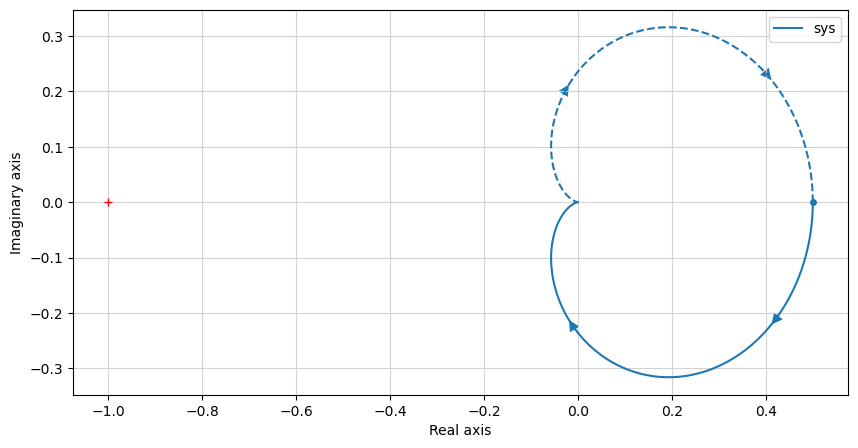

In [ ]:
sys = control.tf([1], [1, 3, 2])

fig = plt.figure(figsize=(10, 5))
control.nyquist_plot(sys);
plt.legend(['sys'], loc='upper right');

**Question**
- Is the system stable?

In [ ]:
# Uncomment the following line to see the solution
!cat answers/solution_nyquist_3


* Yes. The closed loop system is stable
* No open loop unstable poles (open loop poles are s=-1, s=-2)
* There are no encirclements of the point -1

**Comments**
- This method does not tell us the exact plot
- It is enough to verify the stability of the system

<tr>
<td> <img src="img/nyquist-sketch-example-drawn-2.png" alt="nyquist-sketch-example" style="height: 400px;"/> </td>
</tr> 

### Poles on the imaginary axis

Let's consider a pole at the origin:

$$
G(s) = \frac{1}{s}
$$

- As we move closer to the pole:
   - The phase initially is the same (90 deg, see Figure below as the cyan marker goes to 0) 
   - The magnitude gets smaller $\Rightarrow$ the magnitude in the $\Omega-plane$ tends to $\infty$ 
   - When we are right at the pole: the gain is 0, the phase is undefined


<tr>
<td> <img src="img/nyquist-sketch-imaginary-poles-arrow.png" alt="nyquist-sketch-imaginary-poles" style="height: 400px;"/> </td>
</tr> 

- We cannot use the original Nyquist contour with poles on the imaginary axis.
- We modify the contour a bit to avoid the poles on the imaginary axis
- We need to move it as little as possible so that we only remove the imaginary poles but nothing else
- This makes it possible to calculate the phase

<tr>
<td> <img src="img/nyquist-contour.png" alt="nyquist-contour" style="height: 400px;"/> </td>
</tr> 

Going back to our original transfer function $\Large \frac{1}{s}$, when we modify the contour is clear that:
- Gain is still infinity (we are still dividing by a very small number)
- Phase clearly sweeps between $[-90, 90]$
- We can now plot the Nyquist plot


- We can evaluate gain and phase at 3 key s-points:
   - at $w=0$: gain is $\infty$, phase is 0
   - as we loop around the pole: gain is $\infty$, phase goes from $0$ to $-90$ deg.

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/nyquist-sketch-imaginary-poles-2.png" alt="nyquist-sketch-imaginary-poles-2" style="width: 350px;"/> </td>
<td> <img src="img/nyquist-pole-at-origin-1.png" alt="nyquist-pole-at-origin" style="width: 350px;"/> </td>
</tr>
</table>

- And then reflect the Nyquist plot around the real-axis

Let's see what the Python Control Library tells us:

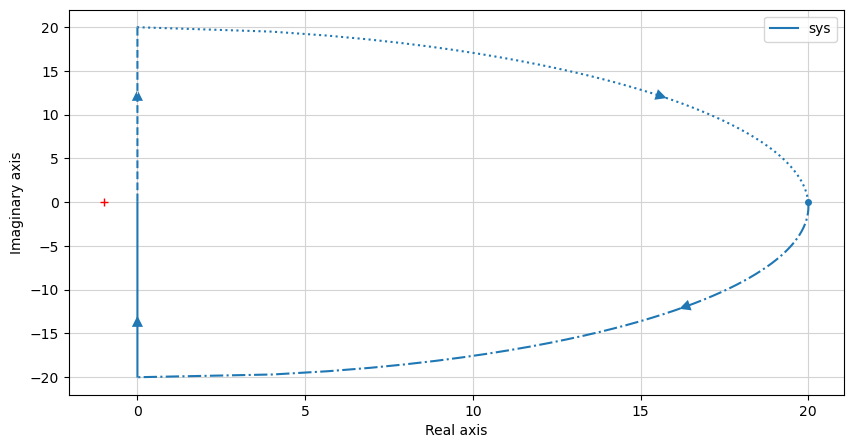

In [ ]:
# We define our transfer function 1/s
sys = control.tf([1], [1, 0])

# Create the figure
fig = plt.figure(figsize=(10, 5))

# Call nyquist_plot
control.nyquist_plot(sys);

# Add a legend
plt.legend(['sys'], loc='upper right');

For this system, with can conclude:
- No OL poles in the RHP and no encirclement of the point -1, so the closed loop system is stable.
- Python control library does not really do a good job to represent it so we need to be careful when interpreting the plot.

- **Question:** 
   - what happens if instead we modified the contour in the other direction?

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/nyquist-axis-2.png" alt="nyquist-axis-2-omega" style="width: 350px;"/> </td>
<td> <img src="img/nyquist-axis-2-omega.png" alt="nyquist-axis-2-omega" style="width: 350px;"/> </td>
</tr>
</table>

- The system is stable:
   - One open loop pole inside the contour
   - The Nyquist plot encircles the -1 point once in the CCW direction
   - Hence no closed loop poles in the RHP

**Open Loop zeros on the imaginary axis?**

- The gain is zero 
- Phase not defined
- However since the gain is zero this is not a problem: the point is at the origin of the $\Omega$-plane and phase does not change that.

- We could modify the contour but we would get the same result just as if we did not modify the countor: we can simply proceed with the normal Nyquist contour.

### Nyquist plot: final comments

- Nyquist plot is really useful when the Open Loop plant has poles or zeros in the RHP

- Some systems have poles that are barely unstable
   - Bode plots are difficult to read in these cases
   - Nyquist instead provides a much clearer answer 

- Try to compare Bode plots and Nyquist plots when one pole of your system is slightly unstable

Let's use, for example the following transfer function

In [ ]:
sys_u = control.tf([3.553e-15, -0.1642, -0.1243, -0.00161, 9.121e-17],
                 [1, 1.825, 2.941, 0.03508, 0.01522, -1.245e-15])

print(sys_u)


 3.553e-15 s^4 - 0.1642 s^3 - 0.1243 s^2 - 0.00161 s + 9.121e-17
-----------------------------------------------------------------
s^5 + 1.825 s^4 + 2.941 s^3 + 0.03508 s^2 + 0.01522 s - 1.245e-15



We would like to improve its performance using unitary feedback.

We can note that the open loop system is unstable, because there is a change in sign in the characteristic equation.

And then we can also verify it with Python:

In [ ]:
np.roots([1, 1.825, 2.941, 0.03508, 0.01522, -0.1245e-15])

array([-9.08114038e-01+1.44747521j, -9.08114038e-01-1.44747521j,
       -4.38596244e-03+0.0720649j , -4.38596244e-03-0.0720649j ,
        8.18002628e-15+0.j        ])

Let's plot the Bode diagrams.

The Python Control Library does not handle well the very small numbers at the numerator of this example (`Badly conditioned filter coefficients`), while MATLAB does.

The figure below reports results obtained in MATLAB:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/matlab_bode.png" alt="matlab-bode" style="width: 700px;"/> </td>
</tr>
</table>

And we can also show the Nyquist plot:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/matlab_nyquist.png" alt="matlab-nyquist" style="width: 700px;"/> </td>
</tr>
</table>

- There are two CW encirclements of -1
- One OL unstable pole
- A closed loop system with unitary feedback would have 3 unstable poles.